# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import some libraries
import pandas as pd
import numpy as np
import requests
import os
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
# Load data from twitter_archive_enhanced.csv
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
def load_file(myfile):
    with open(myfile, mode = 'wb') as file:
        file.write(resp.content)

In [5]:
#Checking the structure of twitter_archive
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [6]:
# Get the data from the tweet image prediction Url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
resp = requests.get(url)

#Access the content and write to a file. Split and consider the last variable
#Which is image-predictions.tsv
images_data = url.split('/')[-1]
#Extract the data from imapes-prediction.tsv and write to a datframe write Binary
#Call the load_file function
load_file(images_data)

In [7]:
#Extract to a Dataframe using pandas
images_df = pd.read_csv(images_data, sep='\t', engine='python')
#Display the first 3 rows
images_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [8]:
#Check the data structure of the images_df dataframe
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
#Use Twitter API keys we got from Twitter Developper acoount
#We have stored them in one .py file called Creds.py
import Creds
import tweepy
consumer_key = Creds.API_Key
consumer_secret = Creds.API_Secret
access_token = Creds.Access_Token
access_secret = Creds.Access_Token_Secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [10]:
#Get all the tweet ids
tweet_id_all = twitter_archive_df.tweet_id.values

In [11]:
# Get data from api and use Tweet IDs
import time
import json
#For each Ids in twee_ids need to query the data from Twitter API
tweet_nb = 0
tweet_json_data = []
fail_tweet = {}
#Capture the time now. To be used to evaluate the elapsed time
start_time = time.time()

print("Starting the api query : ...")

with open('tweet_json.txt','w') as file:
    for tweet_id in tweet_id_all:
        try:
            tweet_nb += 1
            temp = api.get_status(tweet_id)
            json.dump(temp._json, file)
            file.write('\n')
        except tweepy.TweepError as err:
            fail_tweet[tweet_id] = err
        pass
    
        if tweet_nb % 50 == 0:
            print("Tweet Number # " + str(tweet_nb))

            
delta_time = time.time() - start_time   
    
delta_time_value = time.strftime("%H:%M:%S", time.gmtime(delta_time))
print("\nTime  to query from tweeter.api (HH:MM:SS):  " + delta_time_value + "\n")

print("Number of TweeID with Errors Deleted Tweets or Rate limit exceeded :  {}\n".format(len(fail_tweet)))

Starting the api query : ...
Tweet Number # 50
Tweet Number # 100
Tweet Number # 150
Tweet Number # 200
Tweet Number # 250
Tweet Number # 300
Tweet Number # 350
Tweet Number # 400
Tweet Number # 450
Tweet Number # 500
Tweet Number # 550
Tweet Number # 600
Tweet Number # 650
Tweet Number # 700
Tweet Number # 750
Tweet Number # 800
Tweet Number # 850
Tweet Number # 900
Tweet Number # 950
Tweet Number # 1000
Tweet Number # 1050
Tweet Number # 1100
Tweet Number # 1150
Tweet Number # 1200
Tweet Number # 1250
Tweet Number # 1300
Tweet Number # 1350
Tweet Number # 1400
Tweet Number # 1450
Tweet Number # 1500
Tweet Number # 1550
Tweet Number # 1600
Tweet Number # 1650
Tweet Number # 1700
Tweet Number # 1750
Tweet Number # 1800
Tweet Number # 1850
Tweet Number # 1900
Tweet Number # 1950
Tweet Number # 2000
Tweet Number # 2050
Tweet Number # 2100
Tweet Number # 2150
Tweet Number # 2200
Tweet Number # 2250
Tweet Number # 2300
Tweet Number # 2350

Time  to query from tweeter.api (HH:MM:SS):  00:06

In [12]:
json_file_tweet = 'tweet_json.txt'

#### Read JSON File line per line and save to panda dataframe

In [13]:
#Will be used to append the data
tweet_json_info = []

#Open the file 'tweet_json.txt' and read line by line
with open('tweet_json.txt', 'r') as file:
#Read line by line
    for line in file:
        temp = json.loads(line)
        tweet_json_info.append({'tweet_id': temp['id'],
                        'retweet_count': temp['retweet_count'], 
                        'favorite_count': temp['favorite_count']})

# convert the tweet JSON data dictionary list to a Df
tweet_json_df = pd.DataFrame(tweet_json_info, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])
tweet_json_df.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6968,33696
1,892177421306343426,5272,29216
2,891815181378084864,3464,21971
3,891689557279858688,7191,36777
4,891327558926688256,7715,35178


In [14]:
# Checing the structure of the data
tweet_json_df.info()
# As we have many tweets with errors. We'll use the tweet_json.txt provided in class

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 3 columns):
tweet_id          873 non-null int64
retweet_count     873 non-null int64
favorite_count    873 non-null int64
dtypes: int64(3)
memory usage: 20.5 KB


#### We'll use the file tweet-json.txt provided in the classroom as we have many tweets_id with error from api.query

In [15]:
tweet_json_info = []

#Open the file 'tweet_json.txt' and read line by line
with open('tweet-json.txt', 'r') as file:
#Read line by line
    for line in file:
        temp = json.loads(line)
        tweet_json_info.append({'tweet_id': temp['id'],
                        'retweet_count': temp['retweet_count'], 
                        'favorite_count': temp['favorite_count']})

# convert the tweet JSON data dictionary list to a Df
tweet_json_df = pd.DataFrame(tweet_json_info, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])
tweet_json_df.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [16]:
#We have more rows now
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [17]:
#Save to file to .csv to read it more easily
tweet_json_df.to_csv('tweet_json_data.csv',index=False)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [18]:
# Load all the data gathered previously
archive = pd.read_csv('twitter-archive-enhanced.csv')
predictions = pd.read_csv('image-predictions.tsv', sep = '\t', engine = 'python')
json_data = pd.read_csv('tweet_json_data.csv')

### Archive Data Analysis

In [19]:
#Checking the data structure
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
#Check some statistics
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
#To Drilldown more on the first 30 elements for visual assessment
archive.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [22]:
#To Drilldown more on the last 30 elements for visual assessment
archive.tail(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2326,666411507551481857,NaN,NaN,2015-11-17 00:24:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is quite the dog. Gets really excited whe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666411507...,2,10,quite,None,None,None,None
2327,666407126856765440,NaN,NaN,2015-11-17 00:06:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a southern Vesuvius bumblegruff. Can d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666407126...,7,10,a,None,None,None,None
2328,666396247373291520,NaN,NaN,2015-11-16 23:23:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh goodness. A super rare northeast Qdoba kang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666396247...,9,10,None,None,None,None,None
2329,666373753744588802,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753...,11,10,None,None,None,None,None
2330,666362758909284353,NaN,NaN,2015-11-16 21:10:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Very small. Lives in containe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666362758...,6,10,None,None,None,None,None
2331,666353288456101888,NaN,NaN,2015-11-16 20:32:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a mixed Asiago from the Galápagos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288...,8,10,None,None,None,None,None
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2334,666293911632134144,NaN,NaN,2015-11-16 16:37:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a funny dog. Weird toes. Won't come do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911...,3,10,a,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [23]:
#Checking some statistics or inconsistencies in the numerics columns
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Predictions data structure

In [24]:
#Check the predictions data structure
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
#Check the predictions values for p1
predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [26]:
#Check the predictions values for p2
predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [27]:
#Check the predictions values for p3
predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [28]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


There are **543** tweet id not predicted in p1_dog, **522** in p2_dog and **576** in p3_dog

#### Json_Data Structure

In [30]:
#Check the structure
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [31]:
json_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [32]:
json_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### There is no issue detected in this data

### Quality issues
1. There are only 181 values for **retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp** 

2. There are only 78 values of : **in_reply_to_status_id,in_reply_to_user_id**  

3. There are 59 missing Url : **expanded_urls**  2297 values over 2356 rows

4. The **timestamp** is a Object(string).

5. Inconsistent values of **name** like: None, a, an, the

6. Inconsistent values **Rating_denominator** : 170 ; 0 and values >10

7. Inconsistent values **Rating_numerator** : 1176 and all the values >15

8. **Source** values are not unique. Url+source. Need to get only the source

### Tidiness issues
1.There are 4 columns for Dogs type : **doggo,floofer,pupper,puppo**   

2.There are many columns related predictions and confidence level : **p1,p2,p3 & p1_dog, p2_dog, p3_dog & p1_conf, p2_conf, p3_conf**


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data
archive_copy = archive.copy()
predictions_copy = predictions.copy()
json_data_copy = json_data.copy()

### Quality Issue #1: There are only 181 values for retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp

**Define** : Drop all the columns related to retweet as they have insufficient data

**code** 

In [38]:
# Print all the tweet with retweet_status_id not null
print(archive_copy['retweeted_status_id'].notnull().sum())

181


In [40]:
#Remove all the tweets with retweeted_status_id null
archive_copy = archive_copy[archive_copy['retweeted_status_id'].isna()]
# checks that the retweets have been effectively removed.
archive_copy['retweeted_status_id'].notnull().sum()

0

In [41]:
#We'll drop all the columns related to retweet as they have insufficient data
archive_copy = archive_copy.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

**Test**

In [42]:
archive_copy.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Quality Issue #2 : There are only 78 values of : in_reply_to_status_id,in_reply_to_user_id

**Define** : Drop all the columns related to retweet as they have insufficient data

#### Code

In [43]:
#We'll drop all the columns related to retweet as they have insufficient data : in_reply_to_status_id and in_reply_to_user_id
archive_copy = archive_copy.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

#### Test

In [44]:
#Check the size
archive_copy.shape

(2175, 12)

In [45]:
#Test the values
archive_copy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Quality Issue #3: There are tweet with missing Url : expanded_urls 2297 values over 2356 rows

#### Define : Check the impact of missing url in the tweets concerned

#### Code

In [46]:
# Number of tweets without urls
sum(archive_copy.expanded_urls.isna())

58

In [47]:
#Diaplay the tweet with no url
tweet_no_url = (archive_copy.expanded_urls.isna())
archive_copy[tweet_no_url][['tweet_id', 'text', 'expanded_urls','rating_numerator','rating_denominator']]
#There is no impact of the missing url on the rating. We can keep those tweets

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator
30,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10
55,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,NaN,17,10
64,879674319642796034,@RealKentMurphy 14/10 confirmed,NaN,14,10
113,870726314365509632,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,10
148,863427515083354112,@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12,10
179,857214891891077121,@Marc_IRL pixelated af 12/10,NaN,12,10
186,856288084350160898,@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14,10
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10
189,855860136149123072,@s8n You tried very hard to portray this good ...,NaN,666,10
218,850333567704068097,@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,13,10


#### We can keep the tweets with missing urls

### Quality Issue #4 :  Rating  Denominator values > 10

In [48]:
archive_copy[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2175.000000,2175.000000
mean,13.215172,10.492874
std,47.725696,7.019084
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [49]:
#Display the denominator values count
archive_copy.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [50]:
#Number of tweet with denominator different of 10
sum(archive_copy.rating_denominator != 10)

22

In [51]:
#Display only the tweet with denominator different of 10
denum_greater_10 = archive_copy.query('rating_denominator != "10"')
denum_greater_10

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,None,None,None,None,None
342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None


Code

In [52]:
#Drop the tweets with denominator != 10
archive_copy.drop(archive_copy[archive_copy['rating_denominator'] != 10].index, inplace = True)

Test

In [53]:
#Check the size after deleting the rows
archive_copy.shape

(2153, 12)

### Quality Issue #5 : The timestamp is a Object(string).

In [54]:
#Define : Convert the timestamp format from String to Date
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2153 non-null int64
timestamp             2153 non-null object
source                2153 non-null object
text                  2153 non-null object
expanded_urls         2099 non-null object
rating_numerator      2153 non-null int64
rating_denominator    2153 non-null int64
name                  2153 non-null object
doggo                 2153 non-null object
floofer               2153 non-null object
pupper                2153 non-null object
puppo                 2153 non-null object
dtypes: int64(3), object(9)
memory usage: 218.7+ KB


In [55]:
#Convert the timestamp format from String to Date
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])

In [56]:
#Test the timestamp format now
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2153 non-null int64
timestamp             2153 non-null datetime64[ns]
source                2153 non-null object
text                  2153 non-null object
expanded_urls         2099 non-null object
rating_numerator      2153 non-null int64
rating_denominator    2153 non-null int64
name                  2153 non-null object
doggo                 2153 non-null object
floofer               2153 non-null object
pupper                2153 non-null object
puppo                 2153 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 218.7+ KB


### Quality Issue #6 : Name values inconsistent

In [57]:
#CHeck the data structure
archive_copy.name.value_counts()

None        664
a            54
Lucy         11
Charlie      11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Sadie         8
Lola          8
the           8
Winston       8
Toby          7
Daisy         7
Koda          6
Bo            6
Bailey        6
Stanley       6
Oscar         6
Bella         6
Jax           6
Scout         5
Leo           5
Buddy         5
Bentley       5
Rusty         5
Dave          5
Louis         5
Milo          5
an            5
           ... 
Ken           1
Oddie         1
Beebop        1
Meyer         1
Eriq          1
Brownie       1
Perry         1
Ronnie        1
Odin          1
Grizz         1
Humphrey      1
Furzey        1
Brudge        1
Ralphé        1
Wesley        1
Ridley        1
Andru         1
Dawn          1
Dot           1
Jackie        1
Thor          1
Barry         1
Molly         1
Linus         1
Pavlov        1
William       1
Milky         1
Teddy         1
Emma          1
Derby         1
Name: name, Length: 953,

There are some inconsistent values : **728** 'none' names and **54** 'a' names, **8** 'the' names
We can't do anything for such a quality issue

### Quality Issue #7 :  Rating  Numerator values > 15

In [58]:
#Value counts for the rating_numerator
archive_copy['rating_numerator'].value_counts()

12      500
10      442
11      425
13      307
9       155
8        98
7        53
14       43
5        36
6        32
3        19
4        15
2         9
1         7
0         2
420       2
75        1
26        1
182       1
27        1
1776      1
15        1
17        1
666       1
Name: rating_numerator, dtype: int64

In [59]:
#Number of tweets rating_numerator >15
rating_num = archive_copy[archive_copy['rating_numerator'] > 15 ]
rating_num.shape[0]

9

In [61]:
#Display the tweet with rating_numerator >15
rating_num

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,None,None,None,None,None
188,855862651834028034,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,None,None,None,None,None
189,855860136149123072,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,666,10,None,None,None,None,None
290,838150277551247360,2017-03-04 22:12:52,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,182,10,None,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1712,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
2074,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [62]:
# Delete the tweets with Rating numerator >15
archive_copy = archive_copy[archive_copy['rating_numerator'] <= 15 ]
archive_copy.shape

(2144, 12)

In [64]:
#Check the tweets with missing rating_nemerator
missing_num = archive_copy.rating_numerator.isna()
archive_copy[missing_num].shape[0]

0

### Quality Issue #8 : Source values are not unique. Url+source. Need to get only the source

In [65]:
#NGet the Value counts of source column
archive_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2012
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [66]:
#Extract only the last data using regular expressions
archive_copy['source'] = archive_copy['source'].str.extract('^<a.+>(.+)</a>$')

In [67]:
# Test the resul
predictions_copy = predictions_copy[predictions.p1_dog.notnull()]
archive_copy.source.value_counts()

Twitter for iPhone     2012
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

In [68]:
#Hisplay the header of archive_copy to check
archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tidiness Issue #1 : 4 columns for the dog's stage 'doggo', 'floofer', 'pupper', 'puppo'

In [69]:
#dispay value_counts for the dog stage
archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2144,2144,2144,2144
unique,2,2,2,2
top,None,None,None,None
freq,2057,2134,1911,2119


#Need to clean the None values and melt the 4 columns into 1

In [70]:
# replace the stage name with 1 where there are not 'none' values and 0 with 'none' values
rep_name = lambda z: 0 if z == 'None' else 1
#Apply the function rep_name for the column doggo
archive_copy.doggo = archive_copy.doggo.apply(rep_name)
#Apply the function rep_name for the column flooter
archive_copy.floofer = archive_copy.floofer.apply(rep_name)
#Apply the function rep_name for the column pupper
archive_copy.pupper = archive_copy.pupper.apply(rep_name)
#Apply the function rep_name for the columnspuppo
archive_copy.puppo = archive_copy.puppo.apply(rep_name)

In [71]:
# Create a stage column columns and concat the 4 columns stages on it
archive_copy['no_stage'] = archive_copy['doggo'] + archive_copy['floofer'] + archive_copy['pupper'] + archive_copy['puppo']

# check the value_counts
archive_copy['no_stage'].value_counts()

0    1801
1     331
2      12
Name: no_stage, dtype: int64

##### There are 14 tweets having 2 dog stages values and 1953 with none values of dog stage

In [72]:
# Set all the 0 values in 'no_stage' to 1
reset_stage = lambda x: 1 if x == 0 else 0

# reset values in 'no_stage' 
archive_copy['no_stage'] = archive_copy['no_stage'].apply(reset_stage)

#Create a stage order
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'no_stage']

In [73]:
#Import some libraries
import numpy as np
# Define the conditions for each dog selection stage
conditions = [
    (archive_copy[stage[0]] == 1),(archive_copy[stage[1]] == 1),(archive_copy[stage[2]] == 1),(archive_copy[stage[3]] == 1),
    (archive_copy[stage[4]] == 1)]

# select the dog stage based on the condition defined. For the 'none' stage, we'll set stage[4]='no_stage'
archive_copy['dog_stage'] = np.select(conditions, stage, default = stage[4])

# We are dropping the columns : flooter, puppo, doggo, pupper, no_stage
archive_copy.drop(stage, axis = 1, inplace = True)
archive_copy.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,no_stage
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,no_stage
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,no_stage
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,no_stage
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,no_stage


In [74]:
#Check the df structure and visula assessment
archive_copy.head(30)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,no_stage
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,no_stage
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,no_stage
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,no_stage
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,no_stage
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,no_stage
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,no_stage
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,no_stage
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,no_stage
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### Tidiness Issues 2 :  There are many columns for predictions  : p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog

In [75]:
#Setting some conditions for algorithm predictions, confidence predictions itselfs
algorithm = [(predictions_copy['p1_dog'] == True),(predictions_copy['p2_dog'] == True),(predictions_copy['p3_dog'] == True)]
#The choice for dog or breed prediction
predict_breed = [predictions_copy['p1'], predictions_copy['p2'],predictions_copy['p3']]
#confidence level
algo_confidence = [predictions_copy['p1_conf'], predictions_copy['p2_conf'], predictions_copy['p3_conf']]

#Choose the predicted dog or breed based on the conditions. Missing prediction is 'no_stage'
predictions_copy['breed'] = np.select(algorithm, predict_breed, default = 'no_stage')

#Choose the confidence level. Default value will be 0
predictions_copy['confidence_level'] = np.select(algorithm, algo_confidence, default = 0)

In [146]:
predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


#### Drop all the other predictions, algorithm and confidence colums

In [76]:
#Drop all the other predictions, algorithm and confidence colums
predictions_copy.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [77]:
#Chech the data structure
predictions_copy.head()

,tweet_id,jpg_url,img_num,breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


## Merge the Json_data and archive_data

In [78]:
archive_copy.shape

(2144, 9)

In [79]:
json_data_copy.shape

(2354, 3)

In [80]:
#Merhe Json_copy and archive_copy
master_data1 = pd.merge(archive_copy, json_data_copy, on = 'tweet_id', how = 'right')

In [81]:
#Check the structure of archive_copy_master
master_data1.shape

(2354, 11)

In [82]:
master_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2354 non-null int64
timestamp             2144 non-null datetime64[ns]
source                2144 non-null object
text                  2144 non-null object
expanded_urls         2094 non-null object
rating_numerator      2144 non-null float64
rating_denominator    2144 non-null float64
name                  2144 non-null object
dog_stage             2144 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 220.7+ KB


#### Merging master_data1 and predictions_copy

In [83]:
predictions_copy.shape

(2075, 5)

In [84]:
#Merge archive_copy_master and predictions_copy
master_data2 = pd.merge(master_data1, predictions_copy, on = 'tweet_id', how = 'left')

In [85]:
#Display the master data
master_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 15 columns):
tweet_id              2354 non-null int64
timestamp             2144 non-null datetime64[ns]
source                2144 non-null object
text                  2144 non-null object
expanded_urls         2094 non-null object
rating_numerator      2144 non-null float64
rating_denominator    2144 non-null float64
name                  2144 non-null object
dog_stage             2144 non-null object
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null float64
breed                 2073 non-null object
confidence_level      2073 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 294.2+ KB


### Quality Issue 9 : Need to clean some tweets missing rating.

In [86]:
#Number of tweets missing rating
sum(master_data2.rating_numerator.isna())

210

In [87]:
#Get the tweets with missing rating_nemerator
missing_num = master_data2.rating_numerator.isna()
master_data2[missing_num]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence_level
2144,886054160059072513,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108,0,NaN,NaN,NaN,NaN
2145,885311592912609280,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19297,0,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1.0,Labrador_retriever,0.908703
2146,881633300179243008,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,129,NaN,NaN,NaN,NaN
2147,879130579576475649,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7181,0,NaN,NaN,NaN,NaN
2148,878404777348136964,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1349,0,NaN,NaN,NaN,NaN
2149,878316110768087041,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6965,0,NaN,NaN,NaN,NaN
2150,877611172832227328,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg,1.0,Irish_setter,0.364729
2151,874434818259525634,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15546,0,NaN,NaN,NaN,NaN
2152,873697596434513921,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12518,0,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1.0,French_bulldog,0.099984
2153,873337748698140672,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1667,0,NaN,NaN,NaN,NaN


In [88]:
#Drop those 210 tweets missing rating and many other info
master_data2 = master_data2[master_data2.rating_numerator.notnull()]
master_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144 entries, 0 to 2143
Data columns (total 15 columns):
tweet_id              2144 non-null int64
timestamp             2144 non-null datetime64[ns]
source                2144 non-null object
text                  2144 non-null object
expanded_urls         2094 non-null object
rating_numerator      2144 non-null float64
rating_denominator    2144 non-null float64
name                  2144 non-null object
dog_stage             2144 non-null object
retweet_count         2144 non-null int64
favorite_count        2144 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
breed                 1971 non-null object
confidence_level      1971 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 268.0+ KB


In [89]:
#Check the data structure
master_data2.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence_level
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,no_stage,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,no_stage,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,no_stage,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581


In [90]:
#Drop img_num column not useful
master_data2.drop(['img_num'], axis=1, inplace=True)
master_data2

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confidence_level
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,no_stage,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,no_stage,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,no_stage,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,no_stage,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,no_stage,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,no_stage,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,no_stage,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,no_stage,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,no_stage,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,no_stage,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [91]:
#Save the cleaned data to twitter_archive_master
master_data2.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [92]:
#Load the data from twitter_archive_master
df = pd.read_csv('twitter_archive_master.csv')
df

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confidence_level
0,0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,no_stage,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,no_stage,0.000000
1,1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,no_stage,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,no_stage,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,no_stage,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,no_stage,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
5,5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,None,no_stage,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
6,6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,no_stage,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703
7,7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,None,no_stage,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142
8,8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,no_stage,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574
9,9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319


### Insights:
1. The top rating **note** used

2. The **top dog stage** in the data set

3. The top 10 **favourite tweets**

4. The dog picture corresponding to the **top favourit tweet**

5. The top 10 **retweeted** tweets

6. Top 15 Breed per **favourite count**

7. Top 15 Breed per **retweet count**

8. The repartition of tweet **source**

### Visualization

### 1. The top rating note used

In [96]:
#Display the Rating per counts
df['rating_numerator'].value_counts()

12.0    500
10.0    442
11.0    425
13.0    307
9.0     155
8.0      98
7.0      53
14.0     43
5.0      36
6.0      32
3.0      19
4.0      15
2.0       9
1.0       7
0.0       2
15.0      1
Name: rating_numerator, dtype: int64

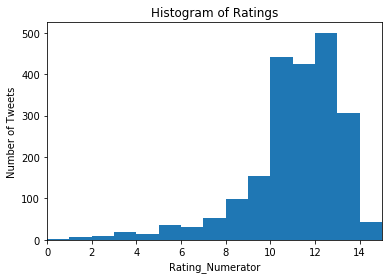

In [97]:
import matplotlib.pyplot as plt
df['rating_numerator'].plot(kind = 'hist', bins=15)
plt.title('Histogram of Ratings')
plt.ylabel('Number of Tweets')
plt.xlabel('Rating_Numerator')
plt.xlim(0, 15)
plt.show();

#### The most Rating note given is **12**

### 2. The top dog stage in the data set

In [98]:
df['dog_stage'].value_counts()

no_stage    1801
pupper       223
doggo         85
puppo         25
floofer       10
Name: dog_stage, dtype: int64

In [99]:
def percentage(num, denum):
    return num/denum

In [100]:
a = df[df['dog_stage'] == 'no_stage']
num = a.shape[0]
denum = df.shape[0]
perc_no_stage = percentage(num, denum)
perc_no_stage

0.840018656716418

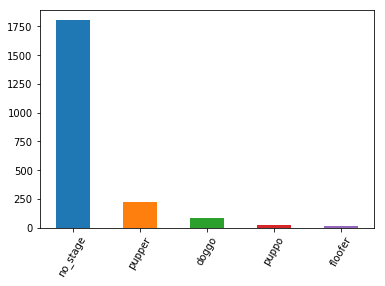

In [101]:
#Plot an Histogram for the dog style
dog_stage = df['dog_stage'].value_counts()
dog_stage.plot(kind='bar')
plt.xticks(rotation=60)
plt.show();

#### Dog stage is not specified for 84.00% of dogs

### 3. The 10 top favourite tweets

In [110]:
#Sort the top tweets based on favourite count
df.sort_values(by = 'favorite_count', ascending = False).head(10)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confidence_level
342,342,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10.0,None,puppo,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015
850,850,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,None,doggo,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333
62,62,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10.0,Duddles,no_stage,45849,107956,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English_springer,0.383404
437,437,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10.0,Stephan,no_stage,56625,107015,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370
118,118,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13.0,10.0,Jamesy,pupper,32883,106827,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French_bulldog,0.905334
367,367,819004803107983360,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14.0,10.0,Bo,doggo,42228,95450,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,0.351308
102,102,870374049280663552,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13.0,10.0,Zoey,no_stage,27680,85011,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,golden_retriever,0.841001
439,439,806629075125202948,2016-12-07 22:38:52,Twitter for iPhone,"""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,13.0,10.0,None,no_stage,37911,75639,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,cocker_spaniel,0.046403
146,146,859196978902773760,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12.0,10.0,quite,no_stage,25661,75193,https://pbs.twimg.com/ext_tw_video_thumb/85919...,malamute,0.216163
888,888,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13.0,10.0,None,doggo,52360,75163,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Eskimo_dog,0.503372


In [114]:
#Get the url of the top favourite tweet
Top_favoutite = df[df['tweet_id'] == 822872901745569793 ]
Top_favoutite.jpg_url

342    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

### 4. The dog picture for the top favourite tweet

In [115]:
#Open the dog image for the top favorite tweet
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg")

### 5. The top 15 Breed aggregated by favourite counts

In [116]:
#Sort the top tweets based on Retweet count
df.sort_values(by = 'retweet_count', ascending = False).head(10)

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,breed,confidence_level
850,850,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,None,doggo,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333
437,437,807106840509214720,2016-12-09 06:17:20,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13.0,10.0,Stephan,no_stage,56625,107015,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370
888,888,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright...,https://twitter.com/dog_rates/status/739238157...,13.0,10.0,None,doggo,52360,75163,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Eskimo_dog,0.503372
342,342,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,10.0,None,puppo,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015
62,62,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13.0,10.0,Duddles,no_stage,45849,107956,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English_springer,0.383404
367,367,819004803107983360,2017-01-11 02:15:36,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14.0,10.0,Bo,doggo,42228,95450,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,standard_poodle,0.351308
439,439,806629075125202948,2016-12-07 22:38:52,Twitter for iPhone,"""Good afternoon class today we're going to lea...",https://twitter.com/dog_rates/status/806629075...,13.0,10.0,None,no_stage,37911,75639,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,cocker_spaniel,0.046403
695,695,761672994376806400,2016-08-05 21:19:27,Twitter for iPhone,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...,https://twitter.com/dog_rates/status/761672994...,10.0,10.0,None,no_stage,33421,55016,https://pbs.twimg.com/ext_tw_video_thumb/76167...,no_stage,0.000000
118,118,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13.0,10.0,Jamesy,pupper,32883,106827,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French_bulldog,0.905334
1623,1623,676219687039057920,2015-12-14 01:58:31,Twitter for iPhone,This is Kenneth. He's stuck in a bubble. 10/10...,https://twitter.com/dog_rates/status/676219687...,10.0,10.0,Kenneth,no_stage,31989,67100,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,whippet,0.000132


### 6 Top 15 Breed per favourite count

In [117]:
#Sort the top 15 weets based on favourite counts
#Removing the tweet with none value for breed
Fav  = df[df.breed != 'no_stage']
#Group all the tweets by breed value
Fav = Fav.groupby(['breed'])
#sum the favourite count for all the dogs
Fav = Fav['favorite_count'].sum()
#Sort the favourite count ascending
Fav = Fav.sort_values(ascending = False)
#Capture only the 15 top
Fav15 = Fav.head(15)
Fav15

breed
golden_retriever            1915928
Labrador_retriever          1262535
Pembroke                    1039484
Chihuahua                    720365
Samoyed                      583906
French_bulldog               570921
chow                         443610
cocker_spaniel               407412
pug                          383817
toy_poodle                   339068
malamute                     332859
Chesapeake_Bay_retriever     302246
Pomeranian                   292661
Cardigan                     269644
Eskimo_dog                   235104
Name: favorite_count, dtype: int64

<Container object of 15 artists>

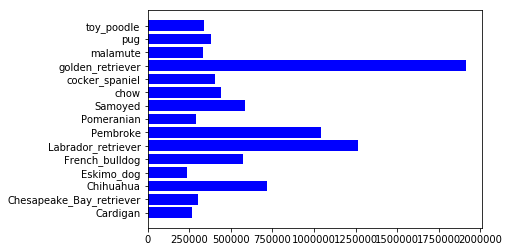

In [118]:
#Plot barth
plt.barh(Fav15.index, Fav15.values, color = 'b')

### Golden_retriever is the top favourite Breed with 1915928 favourite counts

### 7. Top 15 Breed per Retweet count

In [107]:
#Sort the top 15 weets based on retweet counts
#Removing the tweet with none value for breed
Pref  = df[df.breed != 'no_stage']
#Group all the tweets by breed value
Pref = Pref.groupby(['breed'])
#sum the favourite count for all the dogs
Pref = Pref['retweet_count'].sum()
#Sort the favourite count ascending
Pref = Pref.sort_values(ascending = False)
#Capture only the 15 top
Pref15 = Pref.head(15)
Pref15

breed
golden_retriever            575585
Labrador_retriever          402022
Pembroke                    292052
Chihuahua                   236764
Samoyed                     203446
French_bulldog              156230
cocker_spaniel              145743
chow                        129921
pug                         118682
toy_poodle                  115768
Pomeranian                  105102
malamute                    102515
Eskimo_dog                   93183
Chesapeake_Bay_retriever     81730
Cardigan                     79765
Name: retweet_count, dtype: int64

<Container object of 15 artists>

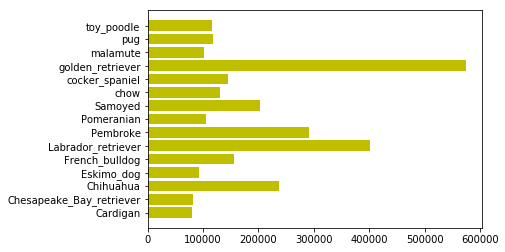

In [108]:
#Plot barth
plt.barh(Pref15.index, Pref15.values, color = 'y')

### 8. The repartition of tweet source

In [121]:
#the tweet source value count
df['source'].value_counts()

Twitter for iPhone     2012
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

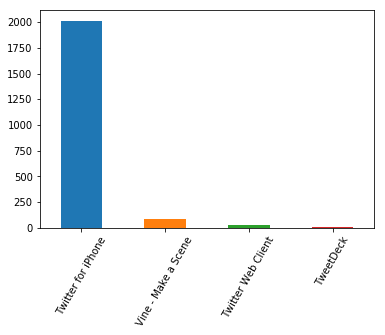

In [122]:
#Plot an Histogram for the tweet source
tweet_source = df['source'].value_counts()
tweet_source.plot(kind='bar')
plt.xticks(rotation=60)
plt.show();

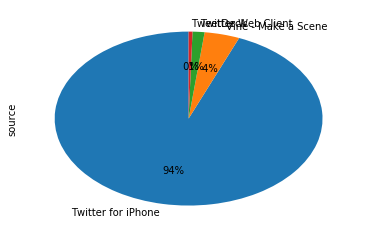

In [130]:
#Plot pie chart
tweet_source.plot(kind='pie', autopct='%2.0f%%',startangle=90);

Almost all the tweet are from **iPhone users**

Creating html reports

In [99]:
#Save as html file

Source code inspiration : 
    
https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o
https://github.com/stephanderton/We-Rate-Dogs-Data-Wrangling-Project/blob/master/wrangle_act.ipynb  
https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
https://www.kaggle.com/code/msytnadeem/weratedogs-tweet-data-wrangling